In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})
sns.set(style="darkgrid")
from kloppy import datasets
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import matplotlib.animation as animation

In [2]:
from kloppy.helpers import load_skillcorner_tracking_data, to_pandas

matchdata_file = '/Users/miguelvidal/Downloads/opendata-master/data/matches/4039/match_data.json'
tracking_file = '/Users/miguelvidal/Downloads/opendata-master/data/matches/4039/structured_data.json'

dataset = load_skillcorner_tracking_data(metadata_filename=matchdata_file,
                                         raw_data_filename=tracking_file)

df = to_pandas(dataset)

In [3]:
metadata = dataset.metadata
home_team, away_team = metadata.teams

[f"{player} ({player.jersey_no})" for player in home_team.players]

['Riyad Mahrez (26)',
 'Bernardo Silva (20)',
 'Nicolas Otamendi (30)',
 'Joao Cancelo (27)',
 'Raheem Sterling (7)',
 'Rodrigo Hernandez (16)',
 'Gabriel Jesus (9)',
 'Kevin de Bruyne (17)',
 'Ilkay Gündogan (8)',
 'Benjamin Mendy (22)',
 'Eric Garcia (50)',
 'Aymeric Laporte (14)',
 'Kyle Walker (2)',
 ' Ederson (31)',
 'Oleksandr Zinchenko (11)',
 'David Silva (21)',
 'Thomas Doyle (69)',
 'John Stones (5)',
 'Claudio Bravo (1)',
 'Phil Foden (47)']

In [4]:
print(f"{home_team.ground} - {home_team}")
print(f"{away_team.ground} - {away_team}")

home - Manchester City
away - Liverpool Football Club


In [5]:
first_frame = dataset.frames[88]
print(f"Number of players in the frame: {len(first_frame.players_coordinates)}")

from pprint import pprint
print("List home team players coordinates")
pprint([
    (player.player_id, player_coordinates) 
    for player, player_coordinates
    in first_frame.players_coordinates.items()
    if player.team == home_team
])

Number of players in the frame: 11
List home team players coordinates
[('home_22', Point(x=0.4804143266072381, y=0.3966489165436764)),
 ('home_2', Point(x=0.4880630824977143, y=0.9800092846735293)),
 ('home_50', Point(x=0.4605476619435238, y=0.9655311421514705)),
 ('home_8', Point(x=0.5422418521915238, y=0.8684051978485294)),
 ('home_14', Point(x=0.4399569217309524, y=0.748723329282353)),
 ('home_16', Point(x=0.5494169198466666, y=0.7629278861514706))]


In [6]:
df.head()

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,home_47_x,home_47_y,home_47_d,home_47_s,...,away_anon_9616_d,away_anon_9616_s,away_anon_9622_x,away_anon_9622_y,away_anon_9622_d,away_anon_9622_s,away_anon_9626_x,away_anon_9626_y,away_anon_9626_d,away_anon_9626_s
0,1,0.7,None,NaN,NaN,NaN,0.442219,0.858696,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.8,None,NaN,NaN,NaN,0.445927,0.829997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.9,None,NaN,0.631063,0.508230,0.450486,0.812099,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,None,NaN,0.639941,0.513352,0.455898,0.805001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.1,None,NaN,0.648167,0.517823,0.462145,0.813194,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,period_id,timestamp,ball_owning_team_id,ball_x,ball_y,home_47_x,home_47_y,home_47_d,home_47_s,home_14_x,...,away_anon_9616_d,away_anon_9616_s,away_anon_9622_x,away_anon_9622_y,away_anon_9622_d,away_anon_9622_s,away_anon_9626_x,away_anon_9626_y,away_anon_9626_d,away_anon_9626_s
count,36896.000000,36896.000000,32677.000000,30820.000000,30820.000000,24388.000000,24388.000000,0.0,0.0,16504.000000,...,0.0,0.0,32.000000,32.000000,0.0,0.0,32.000000,32.000000,0.0,0.0
mean,1.496422,2804.293116,21.062215,0.478152,0.505787,0.486435,0.618135,NaN,NaN,0.407711,...,NaN,NaN,0.253894,0.741643,NaN,NaN,0.088641,0.682225,NaN,NaN
std,0.499994,1647.964993,19.000189,0.243060,0.280326,0.199868,0.210464,NaN,NaN,0.272560,...,NaN,NaN,0.034626,0.024337,NaN,NaN,0.023856,0.023324,NaN,NaN
min,1.000000,0.700000,2.000000,-0.032770,-0.191458,-0.024050,0.008325,NaN,NaN,0.018587,...,NaN,NaN,0.197769,0.696408,NaN,NaN,0.063744,0.660500,NaN,NaN
25%,1.000000,1282.875000,2.000000,0.279227,0.278972,0.348212,0.496107,NaN,NaN,0.181546,...,NaN,NaN,0.223682,0.721012,NaN,NaN,0.069329,0.663819,NaN,NaN
50%,1.000000,2803.150000,40.000000,0.475874,0.507827,0.468202,0.649576,NaN,NaN,0.323722,...,NaN,NaN,0.255582,0.747985,NaN,NaN,0.079950,0.670203,NaN,NaN
75%,2.000000,4163.825000,40.000000,0.663986,0.740078,0.623861,0.779376,NaN,NaN,0.691386,...,NaN,NaN,0.284027,0.764019,NaN,NaN,0.104993,0.698578,NaN,NaN
max,2.000000,5645.300000,40.000000,1.055488,1.071389,1.018914,1.027546,NaN,NaN,0.957014,...,NaN,NaN,0.307615,0.768516,NaN,NaN,0.140164,0.735231,NaN,NaN


In [8]:
df['ball_owning_team_id'].dtype

dtype('float64')

In [9]:
df['ball_owning_team_id'] = df['ball_owning_team_id'].replace({40. : 'Manchester City' , 2. : 'Liverpool'})
df['ball_owning_team_id'].unique()

array([nan, 'Manchester City', 'Liverpool'], dtype=object)

In [10]:
df = df[df.columns.drop(list(df.filter(regex='anon')))]
df.head()

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,home_47_x,home_47_y,home_47_d,home_47_s,...,home_20_d,home_20_s,home_30_x,home_30_y,home_30_d,home_30_s,away_18_x,away_18_y,away_18_d,away_18_s
0,1,0.7,None,NaN,NaN,NaN,0.442219,0.858696,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.8,None,NaN,NaN,NaN,0.445927,0.829997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.9,None,NaN,0.631063,0.508230,0.450486,0.812099,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,None,NaN,0.639941,0.513352,0.455898,0.805001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.1,None,NaN,0.648167,0.517823,0.462145,0.813194,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def to_metric_coordinates(data,field_dimen=(105.,68.) ):

    x_columns = [c for c in data.columns if c[-1].lower()=='x']
    y_columns = [c for c in data.columns if c[-1].lower()=='y']
    data[x_columns] = ( data[x_columns]-0.5 ) * field_dimen[0]
    data[y_columns] = -1 * ( data[y_columns]-0.5 ) * field_dimen[1]

    return data

In [12]:
df = to_metric_coordinates(df, field_dimen=(105.,68.))
df.head()

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,home_47_x,home_47_y,home_47_d,home_47_s,...,home_20_d,home_20_s,home_30_x,home_30_y,home_30_d,home_30_s,away_18_x,away_18_y,away_18_d,away_18_s
0,1,0.7,None,NaN,NaN,NaN,-6.067040,-24.391310,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.8,None,NaN,NaN,NaN,-5.677711,-22.439776,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.9,None,NaN,13.761633,-0.559663,-5.198934,-21.222701,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,None,NaN,14.693770,-0.907936,-4.630710,-20.740084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.1,None,NaN,15.557573,-1.211998,-3.974727,-21.297158,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

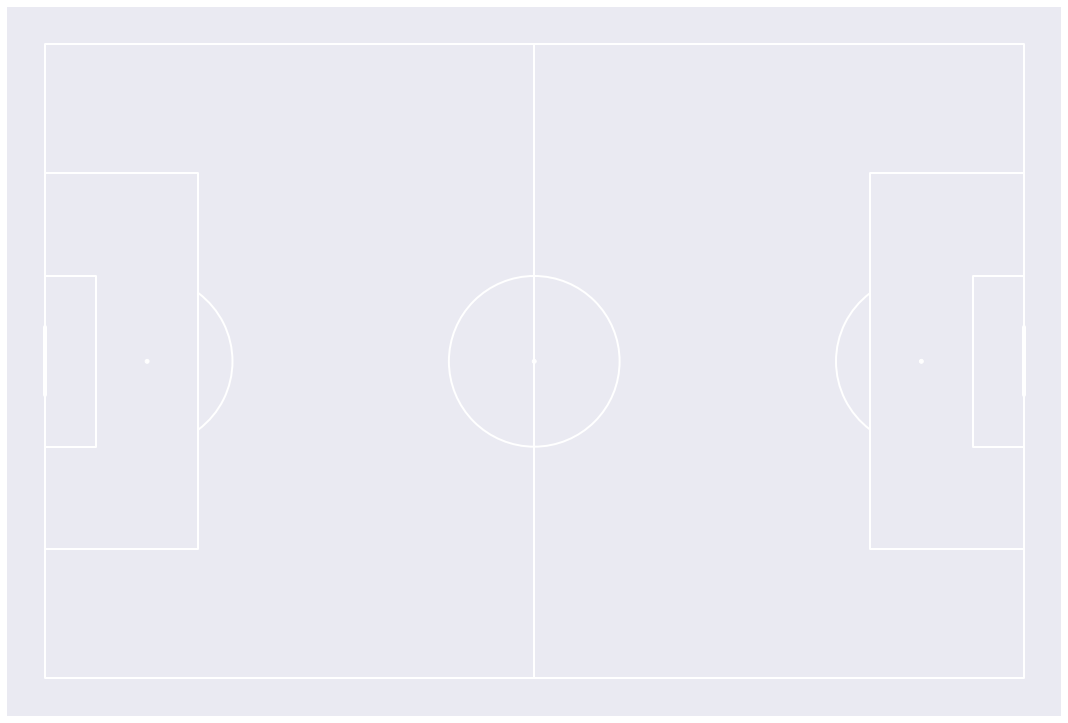

In [14]:
pitch = Pitch(pitch_type='skillcorner', pitch_length = 105, pitch_width = 68)
fig, ax = pitch.draw()

In [15]:
player_ids = np.unique( [ c[:-2] for c in df.columns if c[:4] in ['home','away']] )
player_ids

array(['away_1', 'away_10', 'away_11', 'away_12', 'away_14', 'away_15',
       'away_18', 'away_26', 'away_27', 'away_3', 'away_4', 'away_5',
       'away_66', 'away_76', 'away_8', 'away_9', 'home_14', 'home_16',
       'home_17', 'home_2', 'home_20', 'home_22', 'home_26', 'home_27',
       'home_30', 'home_31', 'home_47', 'home_50', 'home_7', 'home_8',
       'home_9'], dtype='<U7')

In [16]:
import scipy.signal as signal

def calc_player_velocities(team, smoothing=True, filter_='Savitzky-Golay', window=7, polyorder=1, maxspeed = 12):
    
    
    # Get the player ids
    player_ids = np.unique( [ c[:-2] for c in team.columns if c[:4] in ['home','away'] ] )

    # Calculate the timestep from one frame to the next. Should always be 0.04 within the same half
    dt = team['timestamp'].diff()
    
    # index of first frame in second half
    second_half_idx = df.period_id.idxmax(2)
    
    # estimate velocities for players in team
    for player in player_ids: # cycle through players individually
        # difference player positions in timestep dt to get unsmoothed estimate of velicity
        vx = team[player+"_x"].diff() / dt
        vy = team[player+"_y"].diff() / dt

        if maxspeed>0:
            # remove unsmoothed data points that exceed the maximum speed (these are most likely position errors)
            raw_speed = np.sqrt( vx**2 + vy**2 )
            vx[ raw_speed>maxspeed ] = np.nan
            vy[ raw_speed>maxspeed ] = np.nan
            
        if smoothing:
            if filter_=='Savitzky-Golay':
                # calculate first half velocity
                vx.loc[:second_half_idx] = signal.savgol_filter(vx.loc[:second_half_idx],window_length=window,polyorder=polyorder)
                vy.loc[:second_half_idx] = signal.savgol_filter(vy.loc[:second_half_idx],window_length=window,polyorder=polyorder)        
                # calculate second half velocity
                vx.loc[second_half_idx:] = signal.savgol_filter(vx.loc[second_half_idx:],window_length=window,polyorder=polyorder)
                vy.loc[second_half_idx:] = signal.savgol_filter(vy.loc[second_half_idx:],window_length=window,polyorder=polyorder)
            elif filter_=='moving average':
                ma_window = np.ones( window ) / window 
                # calculate first half velocity
                vx.loc[:second_half_idx] = np.convolve( vx.loc[:second_half_idx] , ma_window, mode='same' ) 
                vy.loc[:second_half_idx] = np.convolve( vy.loc[:second_half_idx] , ma_window, mode='same' )      
                # calculate second half velocity
                vx.loc[second_half_idx:] = np.convolve( vx.loc[second_half_idx:] , ma_window, mode='same' ) 
                vy.loc[second_half_idx:] = np.convolve( vy.loc[second_half_idx:] , ma_window, mode='same' )
                
            
                
        
        # put player speed in x,y direction, and total speed back in the data frame
        team[player + "_vx"] = vx
        team[player + "_vy"] = vy
        team[player + "_speed"] = np.sqrt( vx**2 + vy**2 )
        team[player + "_accel"] = team[player + "_speed"].diff() / 1
       

    return team

In [17]:
df_velocity = calc_player_velocities(df, smoothing = True, filter_='moving_average')
df_velocity

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,home_47_x,home_47_y,home_47_d,home_47_s,...,home_7_speed,home_7_accel,home_8_vx,home_8_vy,home_8_speed,home_8_accel,home_9_vx,home_9_vy,home_9_speed,home_9_accel
0,1,0.7,None,None,NaN,NaN,-6.067040,-24.391310,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.8,None,None,NaN,NaN,-5.677711,-22.439776,NaN,NaN,...,NaN,NaN,0.891101,0.762939,1.173089,NaN,NaN,NaN,NaN,NaN
2,1,0.9,None,None,13.761633,-0.559663,-5.198934,-21.222701,NaN,NaN,...,NaN,NaN,1.700380,-0.315828,1.729463,0.556374,NaN,NaN,NaN,NaN
3,1,1.0,None,None,14.693770,-0.907936,-4.630710,-20.740084,NaN,NaN,...,NaN,NaN,2.509660,-1.394596,2.871113,1.141651,NaN,NaN,NaN,NaN
4,1,1.1,None,None,15.557573,-1.211998,-3.974727,-21.297158,NaN,NaN,...,NaN,NaN,3.471332,-3.023214,4.603256,1.732143,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36891,2,5644.9,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.626053,3.312825,3.690374,-0.191605,NaN,NaN,NaN,NaN
36892,2,5645.0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.644917,2.412479,3.579894,-0.110480,NaN,NaN,NaN,NaN
36893,2,5645.1,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.052061,2.378831,3.869614,0.289720,NaN,NaN,NaN,NaN
36894,2,5645.2,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.544137,2.062621,4.100648,0.231034,NaN,NaN,NaN,NaN


In [37]:
def plot_frame( hometeam, awayteam, figax=None, team_colors=('b','r'), field_dimen = (105.0,68.0), include_player_velocities=False, PlayerMarkerSize=10, PlayerAlpha=0.7, annotate=False ):

    if figax is None: # create new pitch 
        fig,ax = pitch.draw()
    else: # overlay on a previously generated pitch
        fig,ax = figax # unpack tuple
    # plot home & away teams in order
    for team,color in zip( [hometeam,awayteam], team_colors) :
        x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x'] # column header for player x positions
        y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y'] # column header for player y positions
        ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
        if include_player_velocities:
            vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
            vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
            ax.quiver( team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color=color, scale_units='inches', scale=10.,width=0.0015,headlength=5,headwidth=3,alpha=PlayerAlpha)
        if annotate:
            [ ax.text( team[x]+0.5, team[y]+0.5, x.split('_')[1], fontsize=10, color=color  ) for x,y in zip(x_columns,y_columns) if not ( np.isnan(team[x]) or np.isnan(team[y]) ) ] 
    # plot ball
    ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
    return fig,ax

In [38]:
df_info = df[['period_id', 'timestamp', 'ball_state', 'ball_owning_team_id', 'ball_x', 'ball_y']]
df_info.head()

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y
0,1,0.7,None,NaN,NaN,NaN
1,1,0.8,None,NaN,NaN,NaN
2,1,0.9,None,NaN,13.761633,-0.559663
3,1,1.0,None,NaN,14.693770,-0.907936
4,1,1.1,None,NaN,15.557573,-1.211998


In [39]:
import re
sel = df.columns.map(lambda x: bool(re.search('home',x)))
home = df[df.columns[sel]]
home = pd.concat([df_info, home], axis=1)
home.head()

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,home_47_x,home_47_y,home_47_d,home_47_s,...,home_7_speed,home_7_accel,home_8_vx,home_8_vy,home_8_speed,home_8_accel,home_9_vx,home_9_vy,home_9_speed,home_9_accel
0,1,0.7,None,NaN,NaN,NaN,-6.067040,-24.391310,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.8,None,NaN,NaN,NaN,-5.677711,-22.439776,NaN,NaN,...,NaN,NaN,0.891101,0.762939,1.173089,NaN,NaN,NaN,NaN,NaN
2,1,0.9,None,NaN,13.761633,-0.559663,-5.198934,-21.222701,NaN,NaN,...,NaN,NaN,1.700380,-0.315828,1.729463,0.556374,NaN,NaN,NaN,NaN
3,1,1.0,None,NaN,14.693770,-0.907936,-4.630710,-20.740084,NaN,NaN,...,NaN,NaN,2.509660,-1.394596,2.871113,1.141651,NaN,NaN,NaN,NaN
4,1,1.1,None,NaN,15.557573,-1.211998,-3.974727,-21.297158,NaN,NaN,...,NaN,NaN,3.471332,-3.023214,4.603256,1.732143,NaN,NaN,NaN,NaN


In [40]:
sel = df.columns.map(lambda x: bool(re.search('away',x)))
away = df[df.columns[sel]]
away = pd.concat([df_info, away], axis=1)
away.head()

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,away_12_x,away_12_y,away_12_d,away_12_s,...,away_76_speed,away_76_accel,away_8_vx,away_8_vy,away_8_speed,away_8_accel,away_9_vx,away_9_vy,away_9_speed,away_9_accel
0,1,0.7,None,NaN,NaN,NaN,17.314753,0.008083,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.8,None,NaN,NaN,NaN,17.370048,-0.156961,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.770215,6.853980,7.078892,NaN
2,1,0.9,None,NaN,13.761633,-0.559663,17.405081,-0.361259,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.646637,4.590345,5.298675,-1.780217
3,1,1.0,None,NaN,14.693770,-0.907936,17.419853,-0.604811,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.523059,2.326709,4.222028,-1.076646
4,1,1.1,None,NaN,15.557573,-1.211998,17.425303,-0.850592,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.422356,-2.011782,4.858446,0.636418


(<Figure size 1080x864 with 1 Axes>, <AxesSubplot:>)

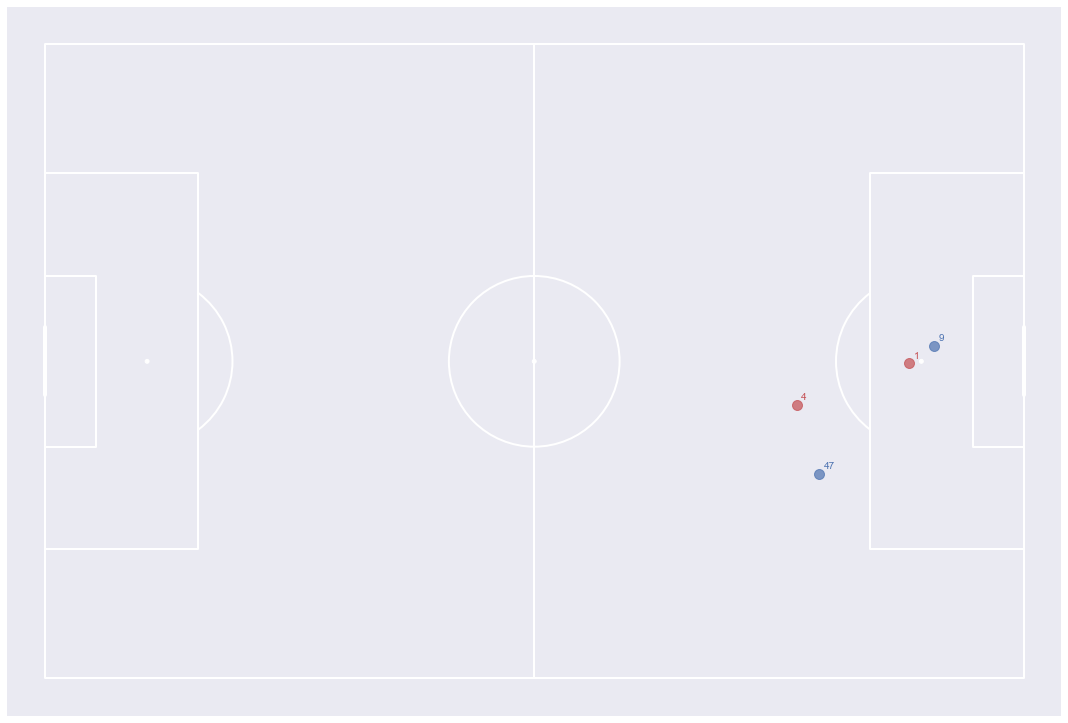

In [41]:
plot_frame(home.loc[1000], away.loc[1000], include_player_velocities=False, annotate=True)

Text(0, 0.5, 'Distance covered [km]')

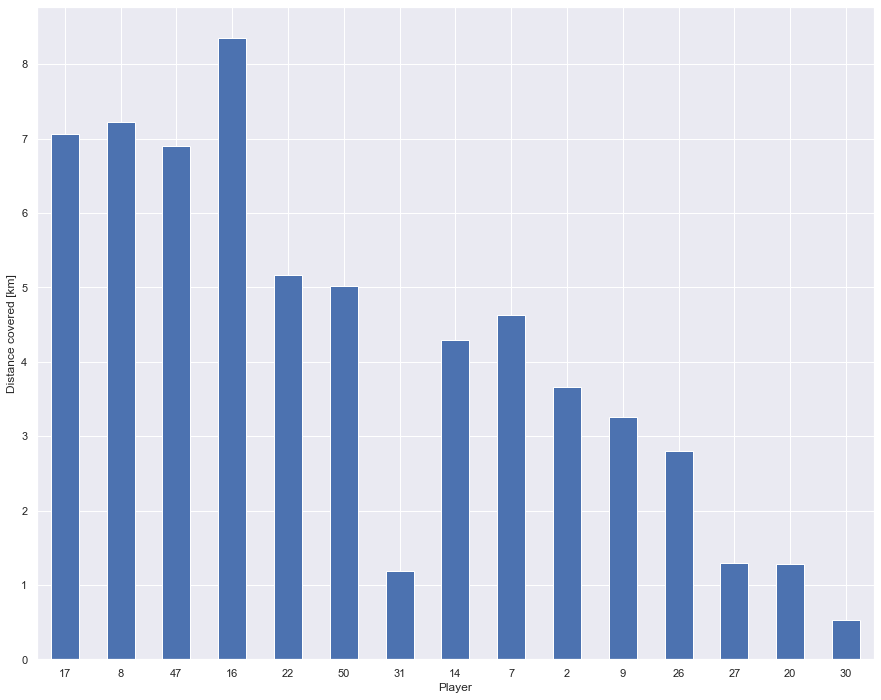

In [23]:
home_players = np.unique( [ c.split('_')[1] for c in home.columns if c[:4] == 'home' ] )
home_summary = pd.DataFrame(index=home_players)

# Calculate minutes played for each player
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'home_' + player + '_x' # use player x-position coordinate
    player_minutes = ( home[column].last_valid_index() - home[column].first_valid_index() + 1 ) / 10 / 60. # convert to minutes
    minutes.append( player_minutes )
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending=False)


# calculate sprinting and acceleration
sprinting = []
avg_sprinting_speed = []
top_speed = []
top_accel = []
for player in home_summary.index:
    column = 'home_' + player + '_speed'
    # sprinting (greater than 7 m/s)
    player_distance = home.loc[ home[column] >= 7, column].sum()/10./1000
    sprinting.append( player_distance )
    #average sprinting speed
    player_avg = home.loc[ home[column] >= 7, column].mean()
    avg_sprinting_speed.append( player_avg )
    #top speed of each player
    player_speed = home.loc[home[column].idxmax(), column]
    top_speed.append(player_speed)
    
for player in home_summary.index:
    column = 'home_' + player + '_accel'
    #max accel of each player
    player_accel = home.loc[home[column].idxmax(), column]
    top_accel.append(player_accel)

    
home_summary['Top Speed [m/s]'] = top_speed
home_summary['Top Acceleration'] = top_accel
home_summary['Avg Sprint Speed'] = avg_sprinting_speed

# Calculate total distance covered for each player
distance = []
for player in home_summary.index:
    column = 'home_' + player + '_speed'
    player_distance = home[column].sum()/10./1000 # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append( player_distance )
home_summary['Distance [km]'] = distance

# make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')


In [24]:
#Minutes played will be off due to broadcast data only capturing player data when in camera view

home_summary

,Minutes Played,Top Speed [m/s],Top Acceleration,Avg Sprint Speed,Distance [km]
17,61.493333,11.969535,10.513578,7.887724,7.067867
8,61.493333,11.939597,9.509303,8.019648,7.218107
47,61.431667,11.679946,7.536129,7.902241,6.896195
16,61.395000,11.982518,10.612174,8.036375,8.352020
22,61.283333,11.758904,8.511000,7.743026,5.170863
50,61.176667,11.857295,8.882228,7.817828,5.014973
31,60.851667,11.498208,6.300600,8.432313,1.180997
14,50.786667,11.941913,9.134764,7.926165,4.289761
7,50.768333,11.965081,7.906006,7.977043,4.622287
2,46.660000,10.467120,8.969353,7.961482,3.661294


In [25]:
home_summary.sort_values(by = 'Top Speed [m/s]', ascending = False)

,Minutes Played,Top Speed [m/s],Top Acceleration,Avg Sprint Speed,Distance [km]
16,61.395000,11.982518,10.612174,8.036375,8.352020
17,61.493333,11.969535,10.513578,7.887724,7.067867
7,50.768333,11.965081,7.906006,7.977043,4.622287
14,50.786667,11.941913,9.134764,7.926165,4.289761
8,61.493333,11.939597,9.509303,8.019648,7.218107
27,14.590000,11.918389,7.705873,7.880767,1.292811
50,61.176667,11.857295,8.882228,7.817828,5.014973
22,61.283333,11.758904,8.511000,7.743026,5.170863
9,37.141667,11.724042,9.541844,7.796374,3.251609
47,61.431667,11.679946,7.536129,7.902241,6.896195


In [26]:
normalized_df=(home_summary[['Top Speed [m/s]', 'Top Acceleration', 'Avg Sprint Speed']]-home_summary[['Top Speed [m/s]', 'Top Acceleration', 'Avg Sprint Speed']].min())/(home_summary[['Top Speed [m/s]', 'Top Acceleration', 'Avg Sprint Speed']].max() - home_summary[['Top Speed [m/s]', 'Top Acceleration', 'Avg Sprint Speed']].min())
quickness_score = normalized_df['Top Speed [m/s]'] + normalized_df['Top Acceleration'] + normalized_df['Avg Sprint Speed']
normalized_df['Quickness Score'] = quickness_score
quick_rank = normalized_df.sort_values(by = 'Quickness Score', ascending = False)

In [27]:
sel = home.columns.map(lambda x: bool(re.search('accel',x)))
accel = home[home.columns[sel]]
#Get absolute values of acceleration dataframe
accel = accel.abs()
accel = accel[accel >= 2]
accel.head()

,home_14_accel,home_16_accel,home_17_accel,home_2_accel,home_20_accel,home_22_accel,home_26_accel,home_27_accel,home_30_accel,home_31_accel,home_47_accel,home_50_accel,home_7_accel,home_8_accel,home_9_accel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.678679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.515720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.970607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
accel = accel.rename(columns = {'home_14_accel' : 'Laporte_accel', 'home_16_accel' : 'Rodrigo_accel', 
                      'home_17_accel' : 'de_Bruyne_accel', 'home_2_accel' : 'Walker_accel',
                      'home_20_accel' : 'Silva_accel', 'home_22_accel' : 'Mendy_accel',
                      'home_26_accel' : 'Mahrez_accel', 'home_27_accel' : 'Cancelo_accel',
                      'home_30_accel' : 'Otamendi_accel', 'home_31_accel' : 'Ederson_accel', 
                      'home_47_accel' : 'Foden_accel', 'home_50_accel' : 'Garcia_accel',
                      'home_7_accel' : 'Sterling_accel', 'home_8_accel' : 'Gündogan_accel',
                      'home_9_accel' : 'Jesus_accel'})


In [29]:
sel = home.columns.map(lambda x: bool(re.search('speed',x)))
vel = home[home.columns[sel]]
vel = vel[vel >= 7]
vel.head()

,home_14_speed,home_16_speed,home_17_speed,home_2_speed,home_20_speed,home_22_speed,home_26_speed,home_27_speed,home_30_speed,home_31_speed,home_47_speed,home_50_speed,home_7_speed,home_8_speed,home_9_speed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.455184,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.606076,NaN,NaN,NaN,NaN


In [30]:
vel = vel.rename(columns = {'home_14_speed' : 'Laporte_speed', 'home_16_speed' : 'Rodrigo_speed', 
                      'home_17_speed' : 'de_Bruyne_speed', 'home_2_speed' : 'Walker_speed',
                      'home_20_speed' : 'Silva_speed', 'home_22_speed' : 'Mendy_speed',
                      'home_26_speed' : 'Mahrez_speed', 'home_27_speed' : 'Cancelo_speed',
                      'home_30_speed' : 'Otamendi_speed', 'home_31_speed' : 'Ederson_speed', 
                      'home_47_speed' : 'Foden_speed', 'home_50_speed' : 'Garcia_speed',
                      'home_7_speed' : 'Sterling_speed', 'home_8_speed' : 'Gündogan_speed',
                      'home_9_speed' : 'Jesus_speed'})


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Laporte_accel'),
  Text(1, 0, 'Rodrigo_accel'),
  Text(2, 0, 'de_Bruyne_accel'),
  Text(3, 0, 'Walker_accel'),
  Text(4, 0, 'Silva_accel'),
  Text(5, 0, 'Mendy_accel'),
  Text(6, 0, 'Mahrez_accel'),
  Text(7, 0, 'Cancelo_accel'),
  Text(8, 0, 'Otamendi_accel'),
  Text(9, 0, 'Ederson_accel'),
  Text(10, 0, 'Foden_accel'),
  Text(11, 0, 'Garcia_accel'),
  Text(12, 0, 'Sterling_accel'),
  Text(13, 0, 'Gündogan_accel'),
  Text(14, 0, 'Jesus_accel')])

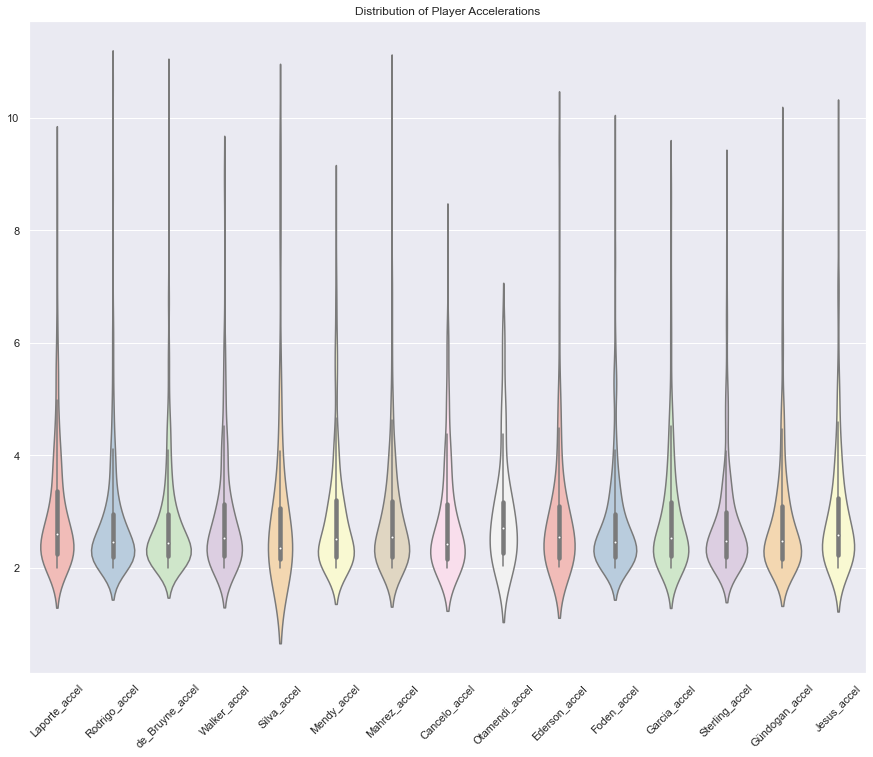

In [31]:
import seaborn as sns
ax = sns.violinplot(data=accel, palette="Pastel1").set_title("Distribution of Player Accelerations")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Laporte_speed'),
  Text(1, 0, 'Rodrigo_speed'),
  Text(2, 0, 'de_Bruyne_speed'),
  Text(3, 0, 'Walker_speed'),
  Text(4, 0, 'Silva_speed'),
  Text(5, 0, 'Mendy_speed'),
  Text(6, 0, 'Mahrez_speed'),
  Text(7, 0, 'Cancelo_speed'),
  Text(8, 0, 'Otamendi_speed'),
  Text(9, 0, 'Ederson_speed'),
  Text(10, 0, 'Foden_speed'),
  Text(11, 0, 'Garcia_speed'),
  Text(12, 0, 'Sterling_speed'),
  Text(13, 0, 'Gündogan_speed'),
  Text(14, 0, 'Jesus_speed')])

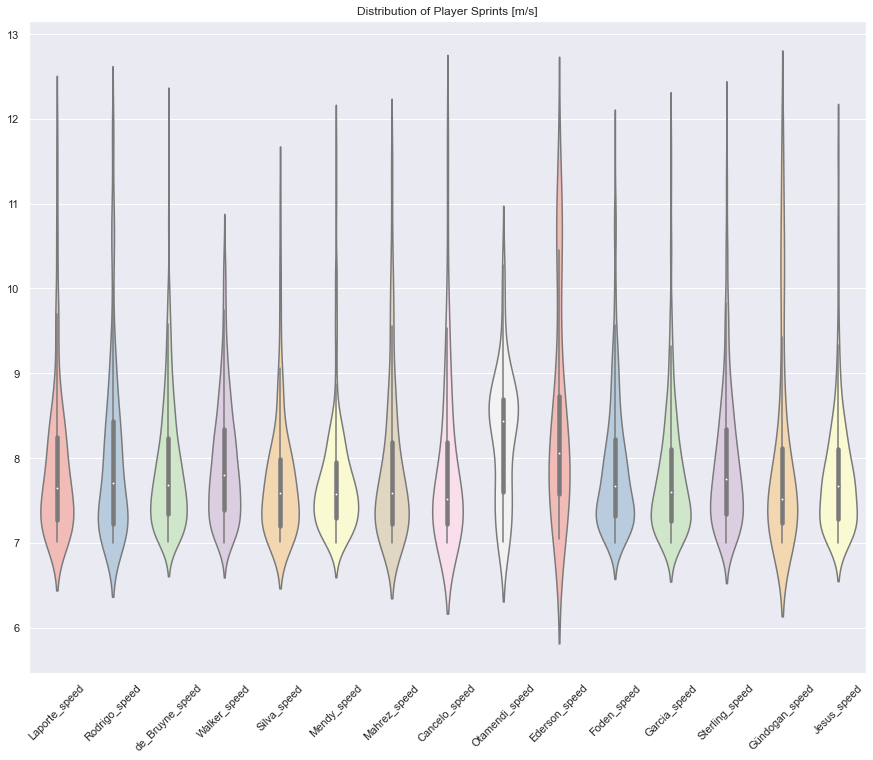

In [32]:
import seaborn as sns
ax = sns.violinplot(data=vel, palette="Pastel1").set_title("Distribution of Player Sprints [m/s]")
plt.xticks(rotation=45)

In [33]:
accel.describe()

,Laporte_accel,Rodrigo_accel,de_Bruyne_accel,Walker_accel,Silva_accel,Mendy_accel,Mahrez_accel,Cancelo_accel,Otamendi_accel,Ederson_accel,Foden_accel,Garcia_accel,Sterling_accel,Gündogan_accel,Jesus_accel
count,383.000000,857.000000,630.000000,242.000000,75.000000,424.000000,284.000000,144.000000,40.000000,148.000000,396.000000,329.000000,403.000000,381.000000,297.000000
mean,3.020893,2.814721,2.783596,2.897147,3.015799,2.913467,2.883558,2.859905,3.001524,2.906315,2.782332,2.923808,2.813928,2.859767,2.993076
std,1.170495,1.096303,0.966818,1.058598,1.594007,1.082209,1.071847,1.037410,1.036815,1.218137,0.942970,1.143626,1.021710,1.117041,1.217420
min,2.001517,2.000273,2.000172,2.000291,2.000678,2.000793,2.000067,2.001409,2.024492,2.006639,2.001103,2.001321,2.001152,2.000646,2.000241
25%,2.240309,2.184729,2.206269,2.206265,2.158702,2.193633,2.188382,2.154203,2.261619,2.175618,2.195951,2.204045,2.194066,2.158275,2.228265
50%,2.594110,2.461086,2.440865,2.518821,2.356650,2.511556,2.542279,2.426748,2.713900,2.550065,2.459057,2.520653,2.478626,2.468465,2.581248
75%,3.362907,2.952791,2.962000,3.132549,3.061558,3.202724,3.178961,3.127270,3.174862,3.101205,2.957546,3.165880,2.993120,3.099203,3.246975
max,9.134764,10.627366,10.513578,8.969353,9.611056,8.511000,10.427925,7.705873,6.070763,9.569670,9.475469,8.882228,8.813133,9.509303,9.541844


In [34]:
vel.describe()

,Laporte_speed,Rodrigo_speed,de_Bruyne_speed,Walker_speed,Silva_speed,Mendy_speed,Mahrez_speed,Cancelo_speed,Otamendi_speed,Ederson_speed,Foden_speed,Garcia_speed,Sterling_speed,Gündogan_speed,Jesus_speed
count,394.000000,430.000000,775.000000,567.000000,143.000000,538.000000,197.000000,74.000000,53.000000,34.000000,789.000000,516.000000,620.000000,171.000000,378.000000
mean,7.926165,8.036375,7.887724,7.961482,7.752307,7.743026,7.885807,7.880767,8.234896,8.432313,7.902241,7.817828,7.977043,8.019648,7.796374
std,0.934933,1.075252,0.754198,0.732880,0.734456,0.716231,0.944708,0.988060,0.772094,1.248610,0.815151,0.797999,0.866027,1.212849,0.741524
min,7.004397,7.003218,7.004540,7.003855,7.007180,7.001042,7.002919,7.000405,7.006423,7.048249,7.003145,7.000399,7.003184,7.000585,7.000635
25%,7.268412,7.226469,7.337681,7.382881,7.197839,7.295371,7.218811,7.221063,7.598980,7.578494,7.314776,7.256774,7.344073,7.229432,7.276980
50%,7.652341,7.711580,7.687395,7.795397,7.589519,7.575928,7.589657,7.522299,8.441873,8.057702,7.669072,7.598969,7.753245,7.518690,7.672965
75%,8.248411,8.434091,8.240614,8.346222,7.987145,7.949506,8.184662,8.186298,8.691262,8.736557,8.224381,8.108048,8.340179,8.120759,8.106078
max,11.941913,11.982518,11.969535,10.467120,11.129764,11.758904,11.580121,11.918389,10.277135,11.498208,11.679946,11.857295,11.965081,11.939597,11.724042


In [35]:
quick_rank

,Top Speed [m/s],Top Acceleration,Avg Sprint Speed,Quickness Score
16,1.000000,1.000000,0.425583,2.425583
17,0.992387,0.978807,0.209925,2.181119
8,0.974832,0.762942,0.401317,2.139091
14,0.976190,0.682436,0.265693,1.924320
31,0.716011,0.073244,1.000000,1.789255
7,0.989775,0.418320,0.339506,1.747601
9,0.848436,0.769937,0.077396,1.695768
50,0.926572,0.628155,0.108522,1.663248
26,0.764043,0.572675,0.207143,1.543861
27,0.962396,0.375302,0.199831,1.537529


In [36]:
player_name = ['Rodrigo', 'de Bruyne', 'Gündogan', 'Laporte', 'Ederson', 'Sterling', 'Jesus', 'Garcia', 'Mahrez', 'Cancelo', 'Mendy', 'Foden', 'Silva', 'Walker', 'Otamendi']

quick_rank['Player Name'] = player_name
quick_rank = quick_rank[['Player Name', 'Top Speed [m/s]', 'Top Acceleration', 'Avg Sprint Speed', 'Quickness Score']]
quick_rank



,Player Name,Top Speed [m/s],Top Acceleration,Avg Sprint Speed,Quickness Score
16,Rodrigo,1.000000,1.000000,0.425583,2.425583
17,de Bruyne,0.992387,0.978807,0.209925,2.181119
8,Gündogan,0.974832,0.762942,0.401317,2.139091
14,Laporte,0.976190,0.682436,0.265693,1.924320
31,Ederson,0.716011,0.073244,1.000000,1.789255
7,Sterling,0.989775,0.418320,0.339506,1.747601
9,Jesus,0.848436,0.769937,0.077396,1.695768
50,Garcia,0.926572,0.628155,0.108522,1.663248
26,Mahrez,0.764043,0.572675,0.207143,1.543861
27,Cancelo,0.962396,0.375302,0.199831,1.537529
